<a href="https://colab.research.google.com/github/HafidzNDP/Python-Basic/blob/main/Classification_Module_Day_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Classification ML Notebook**
this notebook is for understanding the python classification

last update: 2021-06-17

by: Hafidz NDP

## What You Need to Do
1. Open this gdrive folder:  https://drive.google.com/drive/folders/1sjyZNq_iFOCGmA0BWsg823zW5KyEOztd?usp=sharing
2. Create folder in there with format: {your_name}_day24
3. Create Google Colab file in that folder



## *Content*
- Logistic Regression
- Naive Bayes
- Decision Tree

# **Classification**
In statistics, classification is the problem of identifying to which of a set of categories an observation, belongs to. Examples are assigning a given email to the "spam" or "non-spam" class, and assigning a diagnosis to a given patient based on observed characteristics of the patient.

![](https://drive.google.com/uc?export=view&id=1hqQAoUo70kHAPh5b3EafHSFncZ3dBR8q)

In [ ]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# import sklearn library
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# import graph library
import matplotlib.pyplot as plt

In [ ]:
# import statistic library
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Reading the data
For this classification, we will use 3 of the data:
- breast cancer data
- iris data
- wine data


In [ ]:
# see the breast cancer data
breast_cancer_raw_data = datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_raw_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# see the iris data
iris_raw_data = datasets.load_iris()

In [ ]:
print(iris_raw_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
# see the wine data
wine_raw_data = datasets.load_wine()

In [ ]:
print(wine_raw_data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [ ]:
# check data description
breast_cancer_description_data = breast_cancer_raw_data['DESCR']

In [ ]:
print(breast_cancer_description_data)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
# check column name
breast_cancer_column_name = breast_cancer_raw_data['feature_names']

In [ ]:
print(breast_cancer_column_name)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# check target data
breast_cancer_target_data = breast_cancer_raw_data['target']

In [ ]:
print(breast_cancer_target_data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
# check value data
breast_cancer_value_data = breast_cancer_raw_data['data']

In [ ]:
print(breast_cancer_value_data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


### Exploratory Data Analysis

In [ ]:
# merge value data and target data - check data type and shape
print('data type value:',type(breast_cancer_value_data))
print('shape value:',breast_cancer_value_data.shape)
print('\n')
print('data type target:',type(breast_cancer_target_data))
print('shape target:',breast_cancer_target_data.shape)

data type value: <class 'numpy.ndarray'>
shape value: (569, 30)


data type target: <class 'numpy.ndarray'>
shape target: (569,)


In [ ]:
# merge value data and target data - reshape target data
breast_cancer_target_data = breast_cancer_target_data.reshape(-1,1)
print('shape target after reshape:',breast_cancer_target_data.shape)

shape target after reshape: (569, 1)


In [ ]:
# merge value data and target data - final
breast_cancer_merge_data = np.hstack((breast_cancer_value_data,breast_cancer_target_data))
print(breast_cancer_merge_data)

[[1.799e+01 1.038e+01 1.228e+02 ... 4.601e-01 1.189e-01 0.000e+00]
 [2.057e+01 1.777e+01 1.329e+02 ... 2.750e-01 8.902e-02 0.000e+00]
 [1.969e+01 2.125e+01 1.300e+02 ... 3.613e-01 8.758e-02 0.000e+00]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 2.218e-01 7.820e-02 0.000e+00]
 [2.060e+01 2.933e+01 1.401e+02 ... 4.087e-01 1.240e-01 0.000e+00]
 [7.760e+00 2.454e+01 4.792e+01 ... 2.871e-01 7.039e-02 1.000e+00]]


In [ ]:
# read the data as dataframe
df = pd.DataFrame(breast_cancer_merge_data,columns=breast_cancer_column_name.tolist()+['is_cancer'])
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# simple data checking - get row and column of dataframe
print(df.shape)

(569, 31)


In [ ]:
# simple data checking - get columns name
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'is_cancer'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# assign variable for column in numeric type
numeric_column = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [ ]:
# check simple statistic of the numeric value
df[numeric_column].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# check standard missing value - multiple column
df[df.isnull().any(axis=1)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,is_cancer


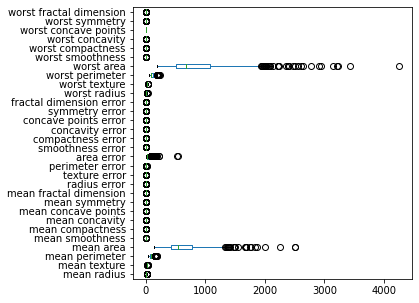

In [ ]:
# check outlier using boxplot
df.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)

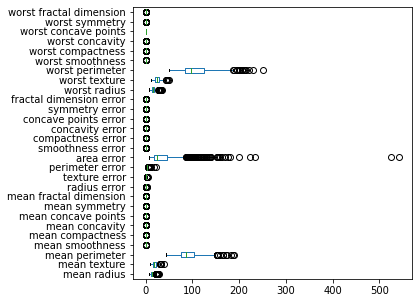

In [ ]:
# check outlier using boxplot - 2
numeric_column_filtered = ['mean radius', 'mean texture', 'mean perimeter',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']
df.boxplot(
    column=numeric_column_filtered,
    fontsize=10,
    rot=0,
    grid=False,
    figsize=(5,5),
    vert=False
    )

In [ ]:
# get IQR for each numeric column
Q1 = df[numeric_column].quantile(0.25)
Q3 = df[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 mean radius                 11.700000
mean texture                16.170000
mean perimeter              75.170000
mean area                  420.300000
mean smoothness              0.086370
mean compactness             0.064920
mean concavity               0.029560
mean concave points          0.020310
mean symmetry                0.161900
mean fractal dimension       0.057700
radius error                 0.232400
texture error                0.833900
perimeter error              1.606000
area error                  17.850000
smoothness error             0.005169
compactness error            0.013080
concavity error              0.015090
concave points error         0.007638
symmetry error               0.015160
fractal dimension error      0.002248
worst radius                13.010000
worst texture               21.080000
worst perimeter             84.110000
worst area                 515.300000
worst smoothness             0.116600
worst compactness            0.147200
worst c

In [ ]:
# remove outlier
non_outlier_df = df.copy()
for x in numeric_column:
  filter_min = non_outlier_df[x]<boxplot_min[x]
  filter_max = non_outlier_df[x]>boxplot_max[x]
  non_outlier_df = non_outlier_df[~(
    filter_min|filter_max
    )]

In [ ]:
non_outlier_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,is_cancer
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0.0
7,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0.0
10,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,0.0
11,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,0.5058,0.9849,3.564,54.16,0.005771,0.040610,0.02791,0.012820,0.02008,0.004144,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,0.0
13,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,0.4033,1.0780,2.903,36.58,0.009769,0.031260,0.05051,0.019920,0.02981,0.003002,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,0.0


In [ ]:
non_outlier_df.shape

(398, 31)

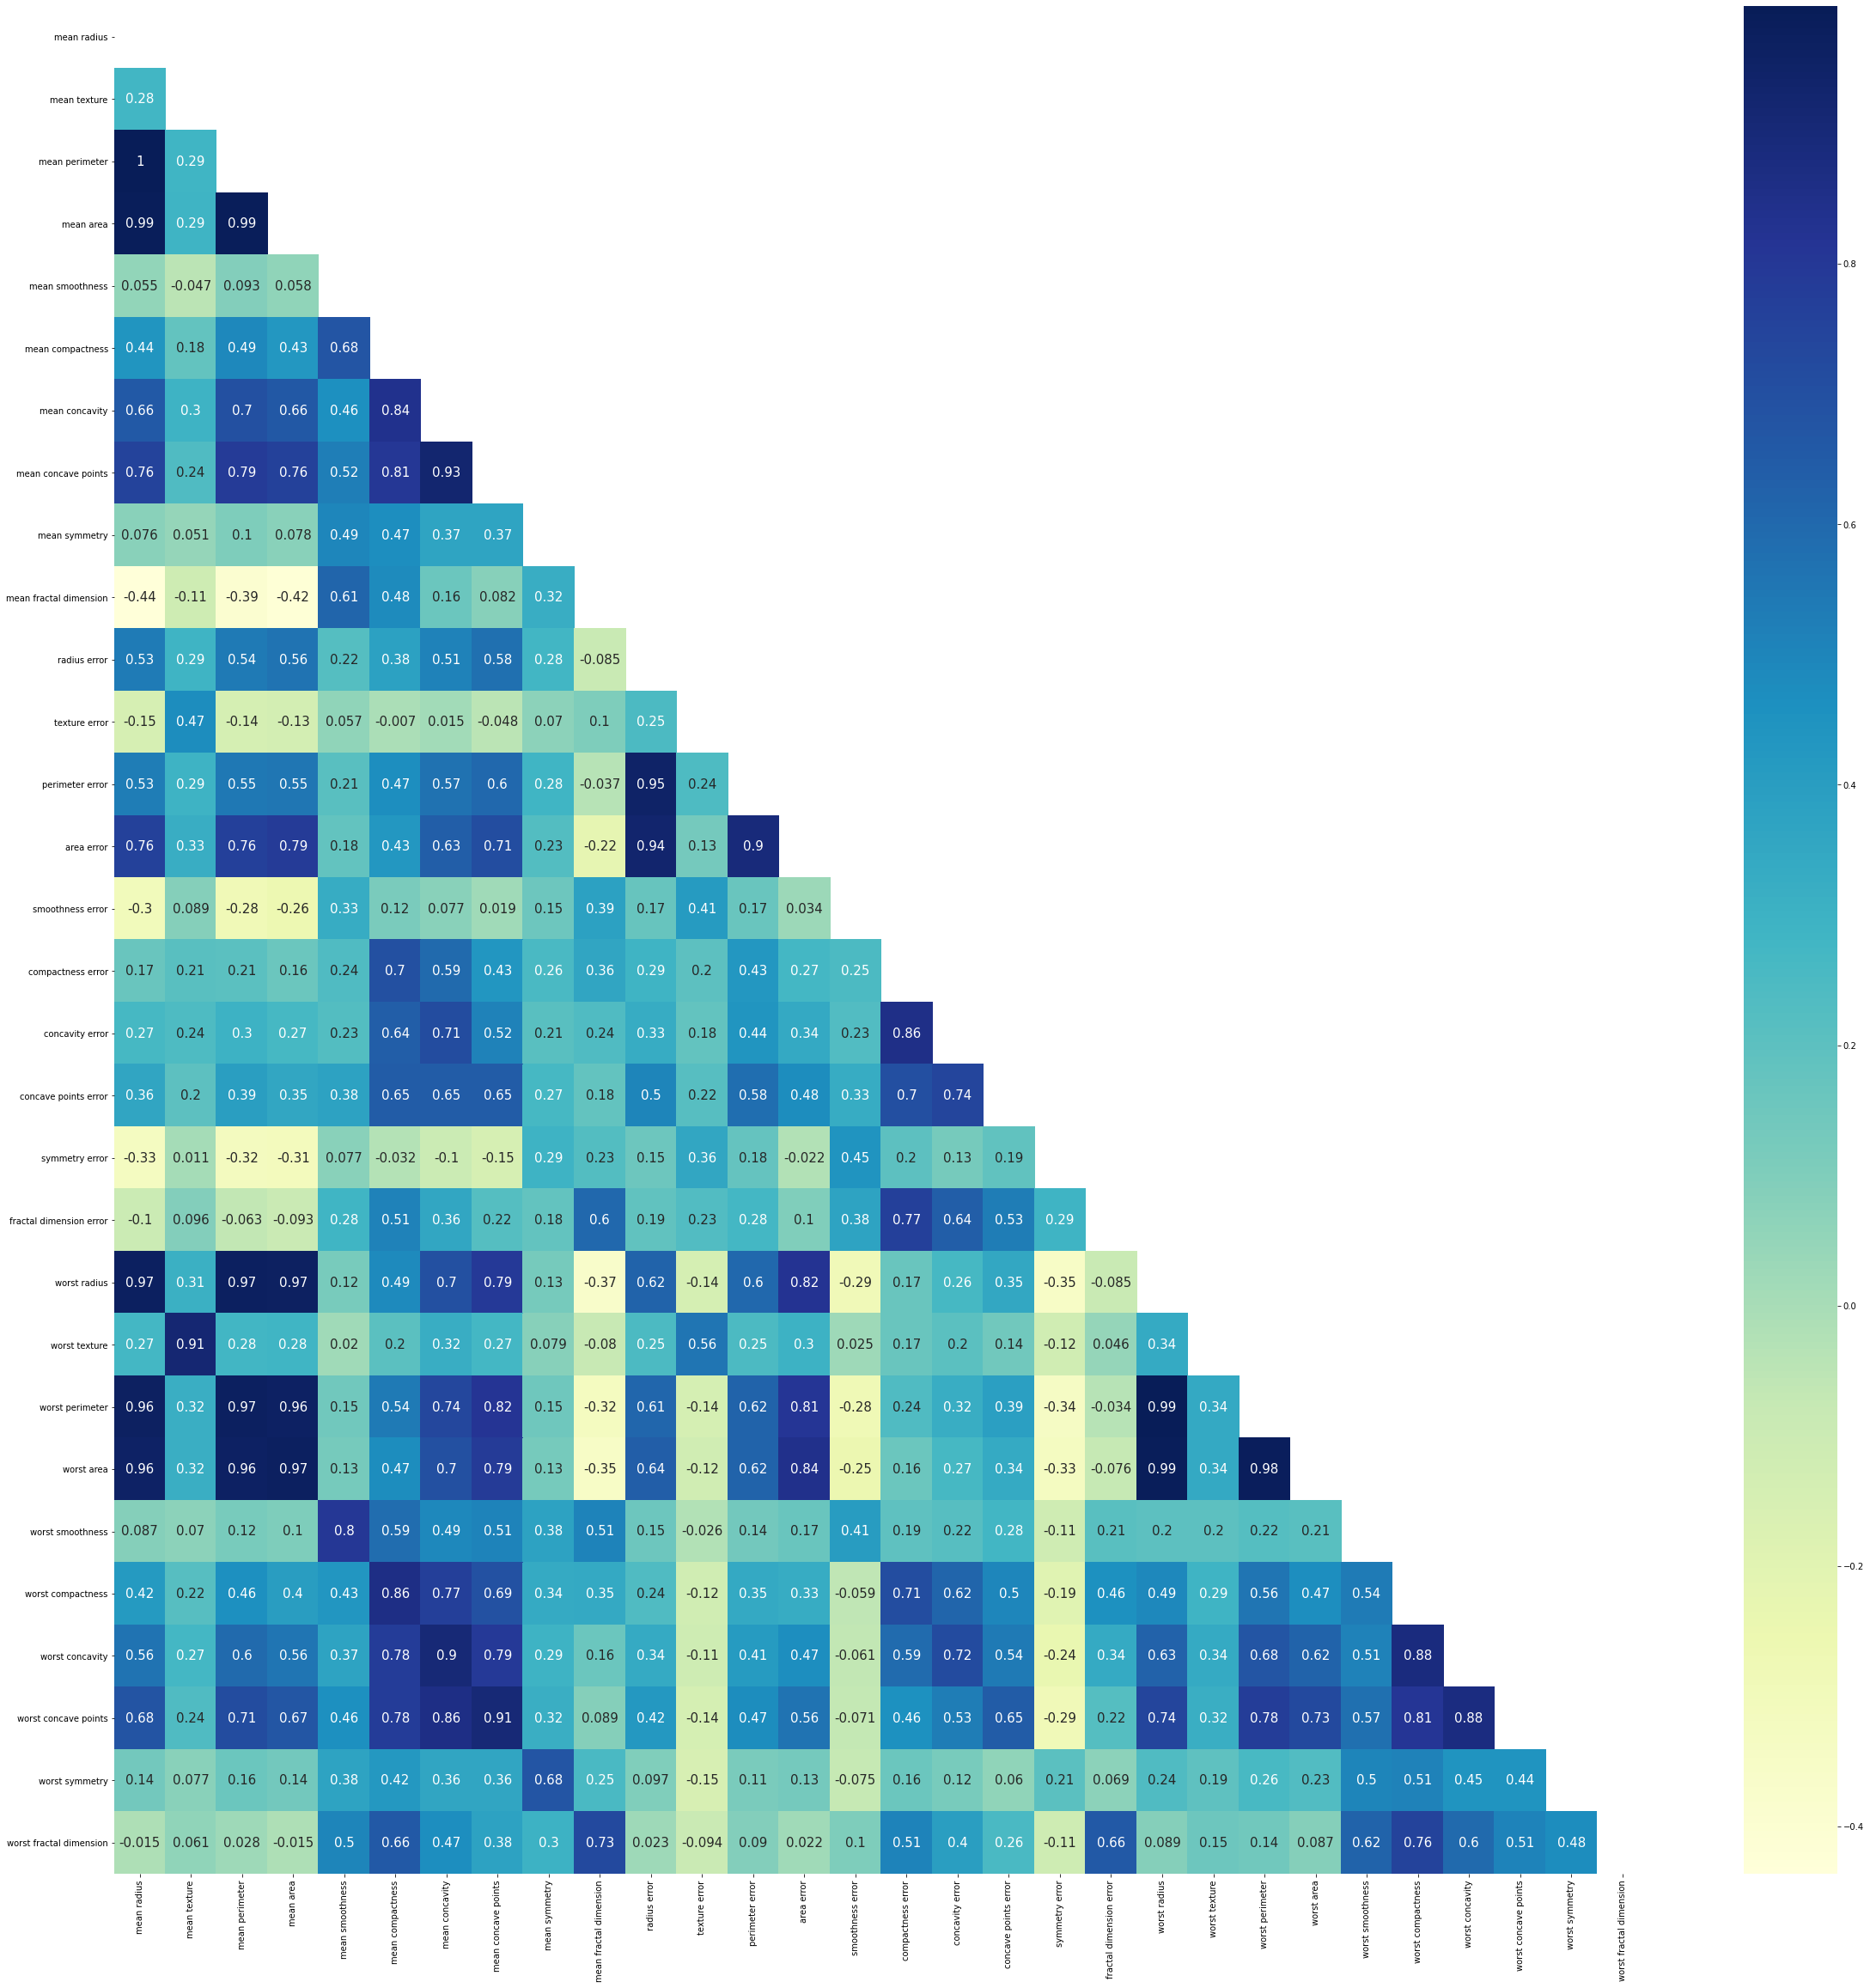

In [ ]:
# check correlation between column

correlation_between_column = non_outlier_df[numeric_column].corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

In [ ]:
final_feature_column = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error']
target_column = ['is_cancer']
final_column = final_feature_column+target_column
final_df = non_outlier_df[final_column].copy()

In [ ]:
# standardize the data
scaler = StandardScaler()
final_standard_df = final_df.copy()
final_standard_df = pd.DataFrame(scaler.fit_transform(final_standard_df[final_feature_column]),columns=final_feature_column)
final_standard_df['is_cancer'] = final_df['is_cancer'].to_numpy()

In [ ]:
final_df.shape

(398, 20)

In [ ]:
final_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,is_cancer
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,0.0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,0.0
10,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,0.0
11,15.780,17.89,103.60,781.0,0.09710,0.12920,0.06606,0.1842,0.06082,0.5058,0.9849,3.564,54.16,0.005771,0.040610,0.02791,0.012820,0.02008,0.004144,0.0
13,15.850,23.95,103.70,782.7,0.08401,0.10020,0.05364,0.1847,0.05338,0.4033,1.0780,2.903,36.58,0.009769,0.031260,0.05051,0.019920,0.02981,0.003002,0.0
16,14.680,20.13,94.74,684.5,0.09867,0.07200,0.05259,0.1586,0.05922,0.4727,1.2400,3.195,45.40,0.005718,0.011620,0.01998,0.011090,0.01410,0.002085,0.0
17,16.130,20.68,108.10,798.8,0.11700,0.20220,0.10280,0.2164,0.07356,0.5692,1.0730,3.854,54.18,0.007026,0.025010,0.03188,0.012970,0.01689,0.004142,0.0
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,1.0
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.03110,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,1.0
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.70,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,1.0


In [ ]:
final_standard_df.shape

(398, 20)

In [ ]:
final_standard_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,is_cancer
0,1.964461,0.377377,1.973596,2.108920,0.112751,0.650915,1.488638,0.277054,-0.756789,1.096726,-0.767777,1.151088,1.763687,-1.041488,-0.553004,-0.097701,0.118967,-0.938850,-0.627520,0.0
1,0.134540,0.594978,0.225722,0.033027,2.126689,2.239566,0.935739,2.210386,2.655183,2.167679,0.684948,1.909090,1.573780,1.211921,0.998964,0.057374,1.133301,-0.716578,1.850387,0.0
2,1.065623,1.211941,0.968866,1.020884,-0.930314,-0.560180,-0.104415,-1.002217,-0.846630,0.570644,0.227813,0.350476,0.901060,-1.184490,-0.981844,-0.861810,-0.575194,-0.765972,0.033919,0.0
3,0.968887,-0.157666,1.022372,0.945414,0.317713,1.229127,1.178389,0.507899,-0.077988,1.559397,-0.258433,1.581669,1.779781,-0.310422,1.971417,0.258176,0.721616,0.275099,0.878539,0.0
4,0.997102,1.393701,1.028317,0.953051,-0.768502,0.399021,0.693088,0.531946,-1.563363,0.756965,-0.034437,0.840486,0.648065,1.695619,1.090367,1.755910,2.482440,2.123568,0.003262,0.0
5,0.525514,0.415777,0.495632,0.511907,0.447993,-0.408185,0.652061,-0.723278,-0.397423,1.300270,0.355330,1.167907,1.215854,-0.337016,-0.760310,-0.267356,0.292570,-0.860960,-0.699566,0.0
6,1.109961,0.556578,1.289904,1.025377,1.969026,3.318703,2.613973,2.056489,2.465518,2.055730,-0.046467,1.906847,1.781068,0.319288,0.501430,0.521274,0.758816,-0.330926,0.877006,0.0
7,0.066019,-1.061350,0.062824,-0.019083,0.374970,-0.142265,0.465286,0.714699,-0.708873,-0.287371,-0.730725,-0.107016,-0.190099,1.039817,-0.479504,-0.009560,0.803457,0.221905,-0.534781,1.0
8,-0.119392,-0.715749,-0.045972,-0.227077,1.180711,1.166153,-0.187643,1.109060,1.377441,-0.950453,-0.829129,-0.863897,-0.762394,-1.150371,-0.066777,-0.466170,-0.848246,-0.351823,-0.438976,1.0
9,-1.560757,-1.552872,-1.549501,-1.332632,0.757510,-0.610845,-0.591669,0.378049,1.565109,-0.229439,-0.277922,-0.274091,-0.696088,1.613831,-0.505889,-0.275971,1.066341,0.311194,-0.022797,1.0


### Logistic Regression

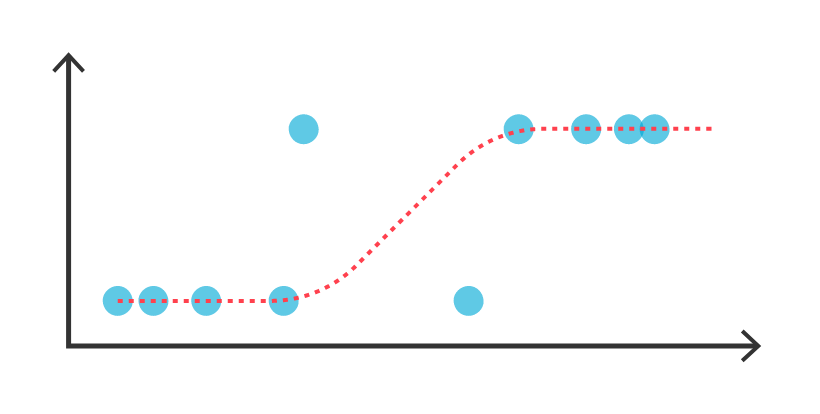

In [ ]:
# prepare the data to numpy array
final_feature_array = final_df[final_feature_column].to_numpy()
target_array = final_df[target_column].to_numpy()

In [ ]:
print('shape of final feature:',final_feature_array.shape)
print('shape of target:',target_array.shape)

shape of final feature: (398, 19)
shape of target: (398, 1)


In [ ]:
# split the data into test and train
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    final_feature_array,
    target_array,
    train_size=0.8,
    random_state=0
    )

In [ ]:
# check the shape data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(318, 19)

Shape Data X Test:
(80, 19)

Shape Data y Train:
(318, 1)

Shape Data y Test:
(80, 1)


In [ ]:
# load the algorithm
classification_model = linear_model.LogisticRegression()

In [ ]:
# train the data
classification_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predict the X using trained model
y_train_pred = classification_model.predict(X_train)
y_test_pred = classification_model.predict(X_test)
target_array_pred = classification_model.predict(final_feature_array)

In [ ]:
print(classification_model.classes_)
print(classification_model.intercept_)
print(classification_model.coef_)

[0. 1.]
[0.88388488]
[[ 3.37860516e+00 -2.38651632e-01 -3.05517996e-01 -2.20948691e-02
  -1.56150517e-01 -5.66973713e-01 -4.34173179e-01 -1.66144960e-01
  -3.21350619e-02  3.06358610e-01  9.85619298e-01  5.53072333e-01
  -1.17294824e-01 -2.34690781e-03 -5.16650142e-02 -1.33152853e-01
  -2.38764386e-02  3.88505548e-02 -5.29896478e-03]]


In [ ]:
print(classification_model.predict_proba(X_test))

[[1.82912927e-02 9.81708707e-01]
 [9.92076628e-01 7.92337248e-03]
 [4.32550644e-02 9.56744936e-01]
 [9.99898224e-01 1.01776043e-04]
 [2.47538018e-02 9.75246198e-01]
 [8.54090891e-01 1.45909109e-01]
 [1.47213218e-02 9.85278678e-01]
 [2.78480044e-03 9.97215200e-01]
 [9.97640454e-01 2.35954592e-03]
 [9.40705450e-02 9.05929455e-01]
 [1.07475729e-02 9.89252427e-01]
 [9.97290682e-01 2.70931843e-03]
 [6.92082730e-02 9.30791727e-01]
 [7.41155127e-01 2.58844873e-01]
 [5.68895499e-01 4.31104501e-01]
 [8.20868805e-03 9.91791312e-01]
 [9.89136431e-01 1.08635692e-02]
 [8.02775541e-02 9.19722446e-01]
 [3.04128466e-02 9.69587153e-01]
 [9.51533238e-02 9.04846676e-01]
 [8.14089664e-03 9.91859103e-01]
 [3.69732817e-02 9.63026718e-01]
 [2.73627380e-02 9.72637262e-01]
 [9.99454112e-01 5.45887899e-04]
 [1.31276771e-01 8.68723229e-01]
 [2.30338763e-01 7.69661237e-01]
 [5.91914693e-02 9.40808531e-01]
 [8.43615289e-02 9.15638471e-01]
 [9.99398341e-01 6.01659272e-04]
 [9.94735553e-02 9.00526445e-01]
 [3.149879

In [ ]:
# check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred[:5])

Real Data
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]

 Predicted Data
[1. 1. 1. 1. 1.]


In [ ]:
# check the data in the form of dataframe
final_with_pred_df = final_df.copy()
final_with_pred_df['is_cancer_predicted'] = target_array_pred.reshape(-1,)
final_with_pred_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,is_cancer,is_cancer_predicted
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,0.0,0.0
7,13.71,20.83,90.2,577.9,0.11890,0.16450,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,0.0,0.0
10,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,0.0,0.0
11,15.78,17.89,103.6,781.0,0.09710,0.12920,0.06606,0.1842,0.06082,0.5058,0.9849,3.564,54.16,0.005771,0.040610,0.02791,0.012820,0.02008,0.004144,0.0,0.0
13,15.85,23.95,103.7,782.7,0.08401,0.10020,0.05364,0.1847,0.05338,0.4033,1.0780,2.903,36.58,0.009769,0.031260,0.05051,0.019920,0.02981,0.003002,0.0,0.0


In [ ]:
# evaluate classification model - accuracy
accuracy_training = metrics.accuracy_score(y_train,y_train_pred)
accuracy_test = metrics.accuracy_score(y_test,y_test_pred)

print('Accuracy Training Data: {}'.format(accuracy_training))
print('Accuracy Test Data: {}'.format(accuracy_test))

Accuracy Training Data: 0.9213836477987422
Accuracy Test Data: 0.9375


In [ ]:
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

[[ 53  19]
 [  6 240]]
[[21  5]
 [ 0 54]]


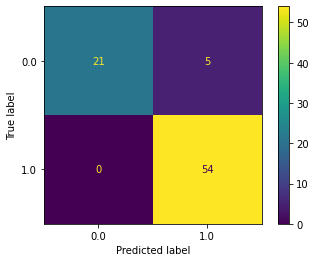

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classification_model, X_test, y_test)

### Naive Bayes
Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem.

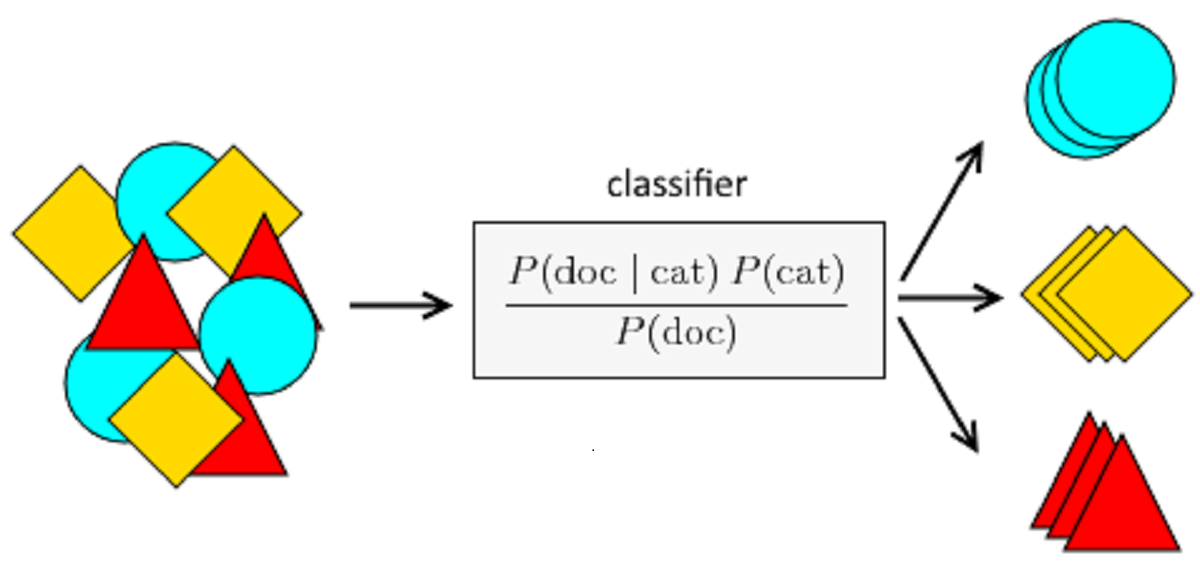

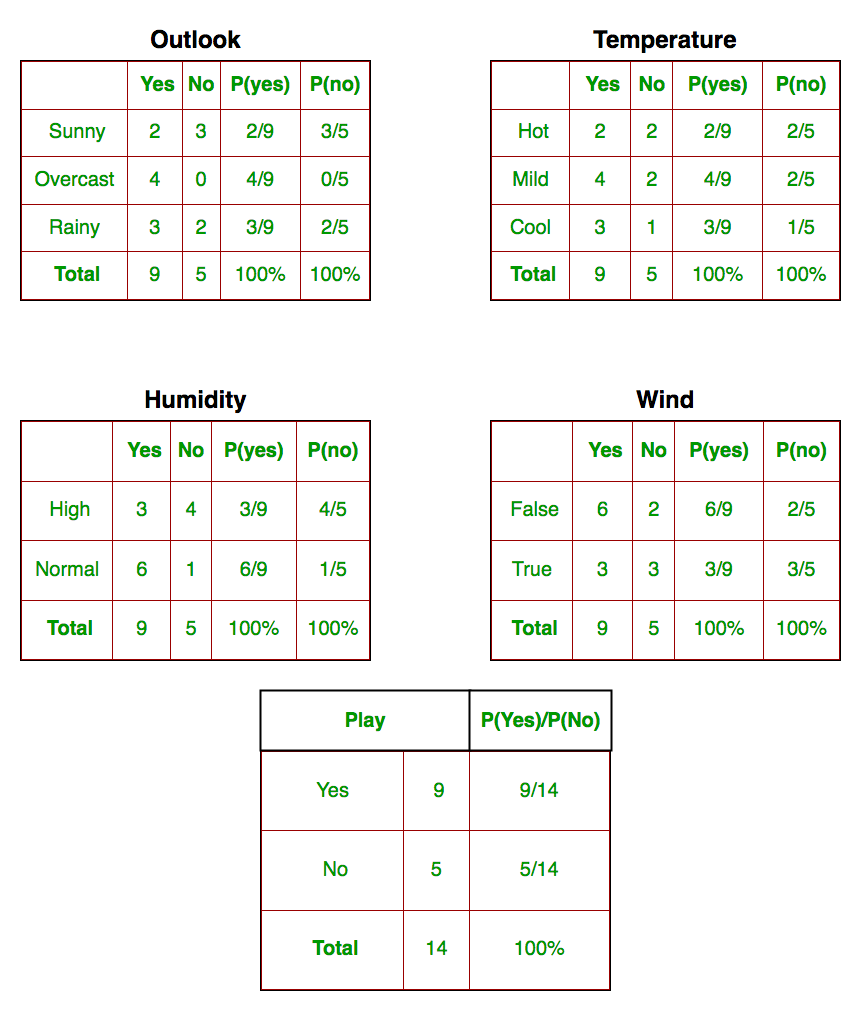

In [ ]:
# prepare the data to numpy array
final_feature_array = final_df[final_feature_column].to_numpy()
target_array = final_df[target_column].to_numpy()

In [ ]:
print('shape of final feature:',final_feature_array.shape)
print('shape of target:',target_array.shape)

shape of final feature: (398, 19)
shape of target: (398, 1)


In [ ]:
# split the data into test and train
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    final_feature_array,
    target_array,
    train_size=0.8,
    random_state=0
    )

In [ ]:
# check the shape data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(318, 19)

Shape Data X Test:
(80, 19)

Shape Data y Train:
(318, 1)

Shape Data y Test:
(80, 1)


In [ ]:
# load the algorithm
from sklearn.naive_bayes import GaussianNB
classification_model = GaussianNB()

In [ ]:
# train the data
classification_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# predict the X using trained model
y_train_pred = classification_model.predict(X_train)
y_test_pred = classification_model.predict(X_test)
target_array_pred = classification_model.predict(final_feature_array)

In [ ]:
# check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred[:5])

Real Data
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]

 Predicted Data
[1. 1. 1. 1. 1.]


In [ ]:
# check the data in the form of dataframe
final_with_pred_df = final_df.copy()
final_with_pred_df['is_cancer_predicted'] = target_array_pred.reshape(-1,)
final_with_pred_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,is_cancer,is_cancer_predicted
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,0.0,0.0
7,13.71,20.83,90.2,577.9,0.11890,0.16450,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,0.0,0.0
10,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,0.0,0.0
11,15.78,17.89,103.6,781.0,0.09710,0.12920,0.06606,0.1842,0.06082,0.5058,0.9849,3.564,54.16,0.005771,0.040610,0.02791,0.012820,0.02008,0.004144,0.0,0.0
13,15.85,23.95,103.7,782.7,0.08401,0.10020,0.05364,0.1847,0.05338,0.4033,1.0780,2.903,36.58,0.009769,0.031260,0.05051,0.019920,0.02981,0.003002,0.0,0.0


In [ ]:
# evaluate classification model - accuracy
accuracy_training = metrics.accuracy_score(y_train,y_train_pred)
accuracy_test = metrics.accuracy_score(y_test,y_test_pred)

print('Accuracy Training Data: {}'.format(accuracy_training))
print('Accuracy Test Data: {}'.format(accuracy_test))

Accuracy Training Data: 0.9182389937106918
Accuracy Test Data: 0.925


In [ ]:
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

[[ 61  11]
 [ 15 231]]
[[21  5]
 [ 1 53]]


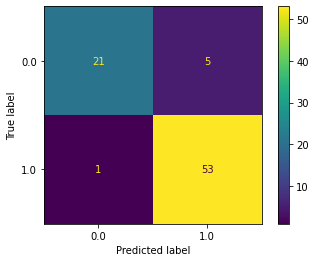

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classification_model, X_test, y_test)

### Decision Tree
A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

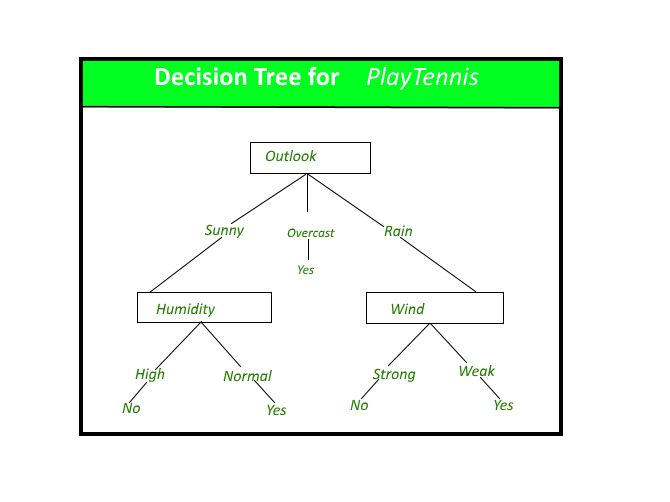

In [ ]:
# load the algorithm
from sklearn.tree import DecisionTreeClassifier
classification_model = DecisionTreeClassifier()

In [ ]:
# train the data
classification_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# predict the X using trained model
y_train_pred = classification_model.predict(X_train)
y_test_pred = classification_model.predict(X_test)
target_array_pred = classification_model.predict(final_feature_array)

In [ ]:
# check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred[:5])

Real Data
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]

 Predicted Data
[1. 1. 1. 1. 1.]


In [ ]:
# check the data in the form of dataframe
final_with_pred_df = final_df.copy()
final_with_pred_df['is_cancer_predicted'] = target_array_pred.reshape(-1,)
final_with_pred_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,is_cancer,is_cancer_predicted
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,0.0,0.0
7,13.71,20.83,90.2,577.9,0.11890,0.16450,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,0.0,0.0
10,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,0.0,0.0
11,15.78,17.89,103.6,781.0,0.09710,0.12920,0.06606,0.1842,0.06082,0.5058,0.9849,3.564,54.16,0.005771,0.040610,0.02791,0.012820,0.02008,0.004144,0.0,0.0
13,15.85,23.95,103.7,782.7,0.08401,0.10020,0.05364,0.1847,0.05338,0.4033,1.0780,2.903,36.58,0.009769,0.031260,0.05051,0.019920,0.02981,0.003002,0.0,0.0


In [ ]:
# evaluate classification model - accuracy
accuracy_training = metrics.accuracy_score(y_train,y_train_pred)
accuracy_test = metrics.accuracy_score(y_test,y_test_pred)

print('Accuracy Training Data: {}'.format(accuracy_training))
print('Accuracy Test Data: {}'.format(accuracy_test))

Accuracy Training Data: 1.0
Accuracy Test Data: 0.9


In [ ]:
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

[[ 72   0]
 [  0 246]]
[[20  6]
 [ 2 52]]


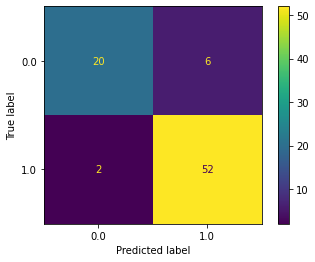

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classification_model, X_test, y_test)

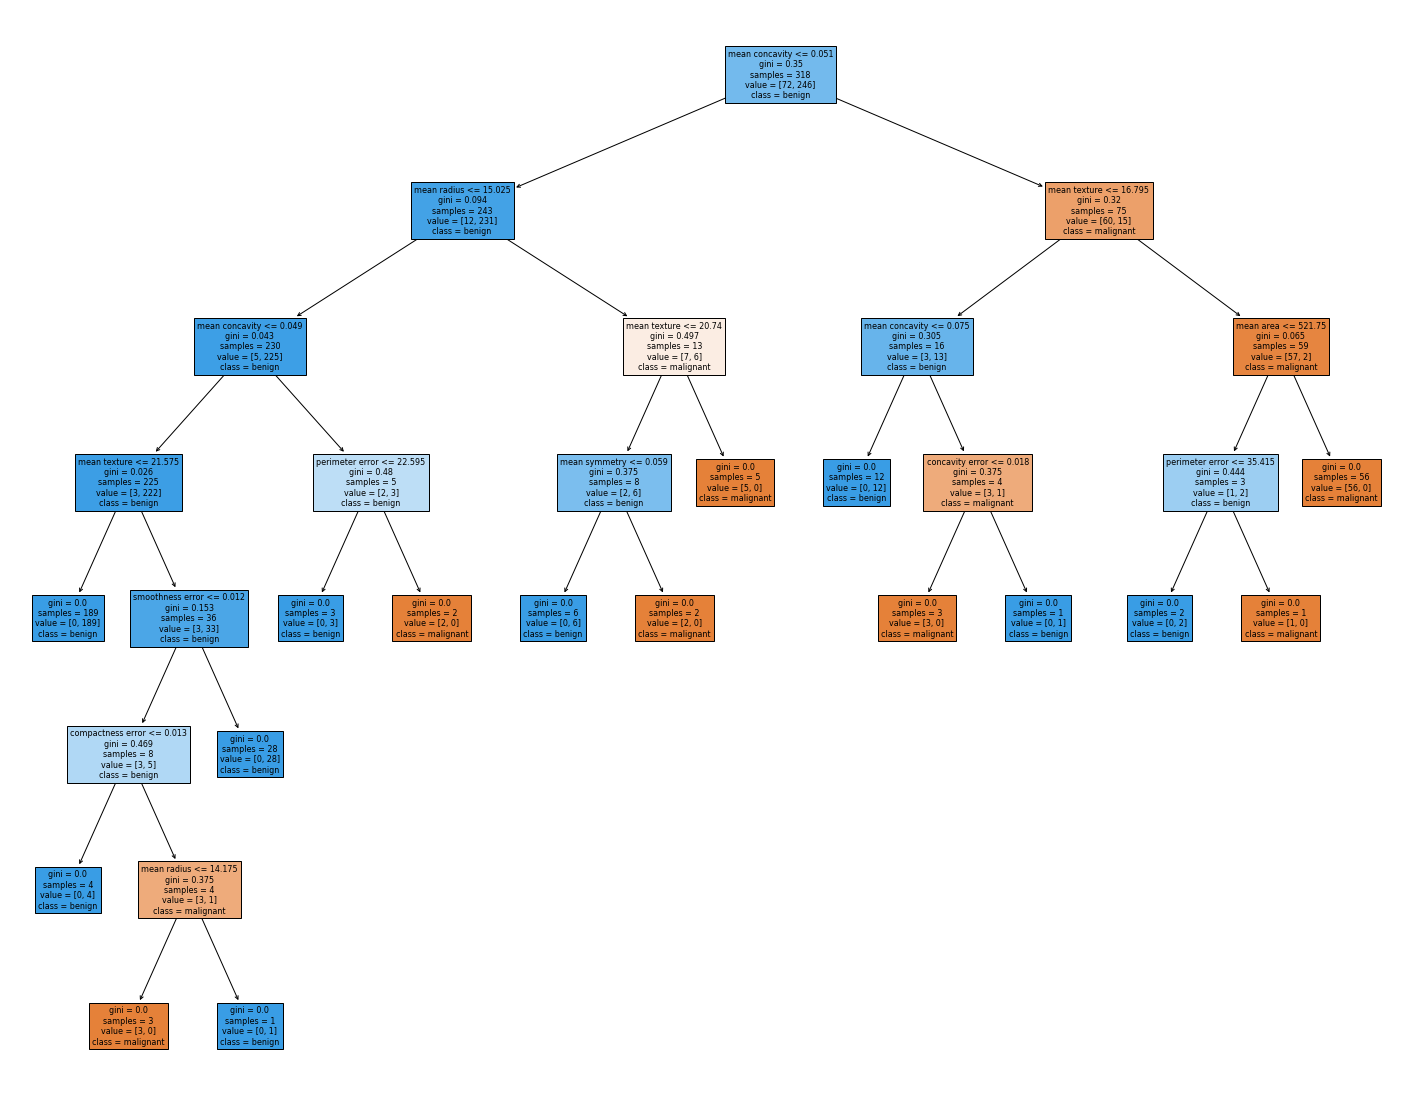

In [ ]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(25,20))
tree.plot_tree(classification_model,ax=ax,feature_names=breast_cancer_column_name,class_names=breast_cancer_raw_data['target_names'],filled=True,max_depth=2)
plt.show()

## Classification Task
Do classification using student_grade_prediction data that are explained here: https://www.kaggle.com/dipam7/student-grade-prediction
which the student that have average score > 15 is good student and <= 15 is bad student